<a href="https://colab.research.google.com/github/saisachin20/CV/blob/main/Flight_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary modules

In [ ]:
import pandas as pd
import numpy as np
from numpy.random import randint 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
%matplotlib inline

Loading the dataset

In [ ]:
data = pd.read_csv("/Clean_Dataset.csv", delimiter=',', encoding = "utf-8")

Exploratory Data Analysis

In [ ]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
data.describe(include = "object")

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


In [ ]:
data.describe(include = "float")

,duration
count,300153.000000
mean,12.221021
std,7.191997
min,0.830000
25%,6.830000
50%,11.250000
75%,16.170000
max,49.830000


In [ ]:
data['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [ ]:
data['source_city'].value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [ ]:
data['departure_time'].value_counts()

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

In [ ]:
data['stops'].value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

In [ ]:
data['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

In [ ]:
data['destination_city'].value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

In [ ]:
data.shape

(300153, 12)

In [ ]:
data.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

Exploratory Data Visualization

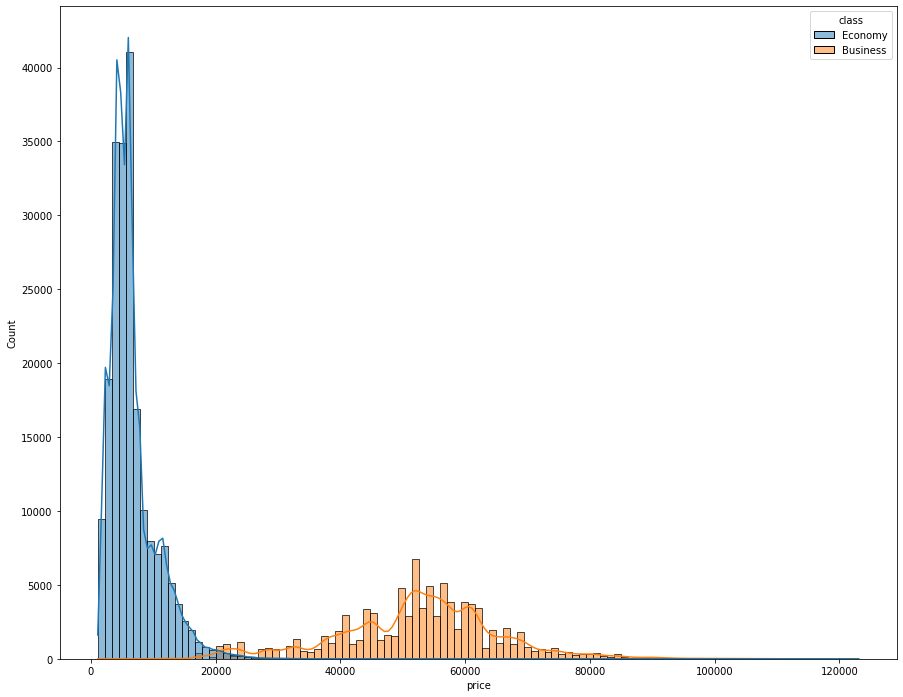

In [ ]:
plt.figure(figsize=(15,12))
sns.histplot(data, x="price", kde=True,hue='class')

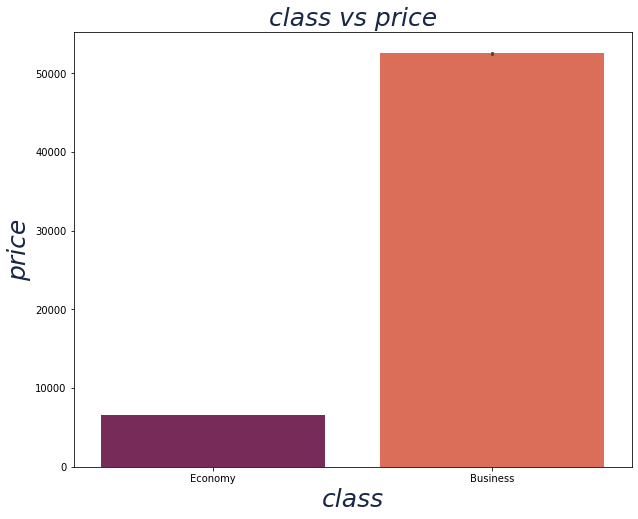

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='class',data=data,y='price',palette='rocket')
plt.xlabel(fontsize=25,color='#182747',xlabel='class',fontstyle='italic')
plt.ylabel(fontsize=25,color='#182747',ylabel='price',fontstyle='italic')
plt.title(label='class vs price',fontsize=25,color='#182747',fontstyle='italic')
plt.rcParams["figure.figsize"] = (10,7)
plt.show()

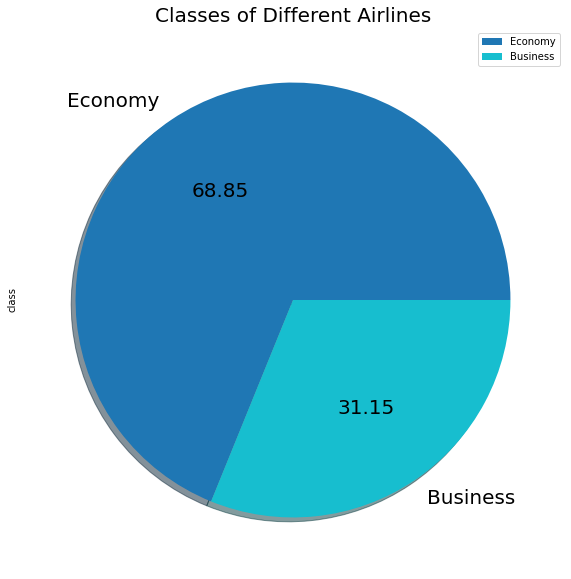

In [ ]:
plt.figure(figsize=(12,10))
data['class'].value_counts().plot(kind='pie',textprops={'color':'black', 'fontsize': 20},autopct='%.2f',cmap='tab10', shadow=True)
plt.title('Classes of Different Airlines',fontsize=20)
plt.legend(['Economy','Business'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


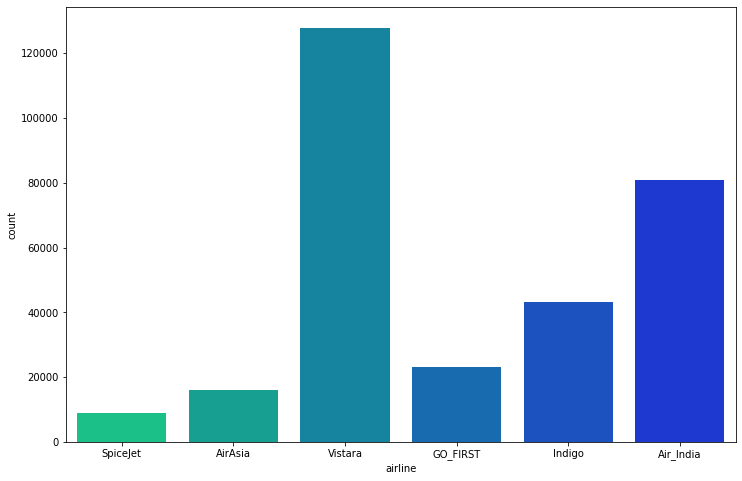

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data['airline'], palette='winter_r');

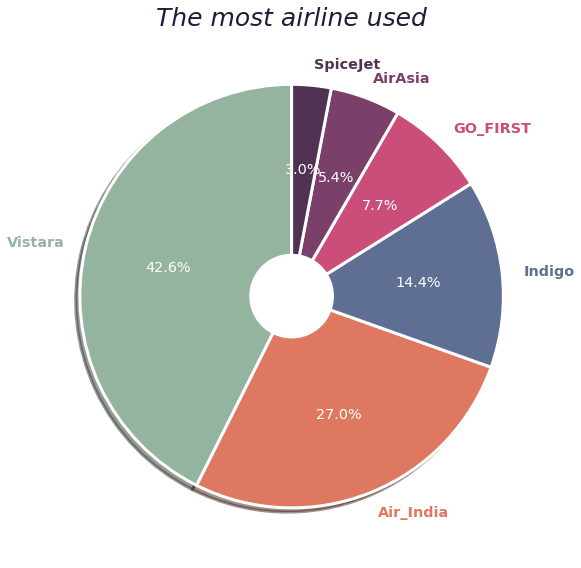

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
colors=['#94B49F','#DF7861','#5F6F94','#CA4E79','#7A4069','#513252']
colors2=['#A1C298','#C6EBC5','#FBF2C','#FFA7070','#DF7861','#F5C7A9']
patches, texts, pcts = ax.pie(
    data.airline.value_counts(), labels=[*data.airline.value_counts().index],shadow=True, autopct='%.1f%%',colors=colors,
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
centre_circle = plt.Circle((0,0),0.20,fc='white') 
plt.gcf().gca().add_artist(centre_circle)
plt.tight_layout()
plt.title(label='The most airline used',fontsize=25,color='#251B37',fontstyle='italic')
plt.tight_layout()

In [ ]:
data.groupby(['airline','flight']).count()

Unnamed: 0  source_city  departure_time  stops  arrival_time  \
airline flight                                                                  
AirAsia I5-1228         144          144             144    144           144   
        I5-1229         408          408             408    408           408   
        I5-1321          83           83              83     83            83   
        I5-1426         139          139             139    139           139   
        I5-1427           2            2               2      2             2   
...                     ...          ...             ...    ...           ...   
Vistara UK-988         1381         1381            1381   1381          1381   
        UK-993          911          911             911    911           911   
        UK-994         1273         1273            1273   1273          1273   
        UK-995         1024         1024            1024   1024          1024   
        UK-996         1266         1266            1266   1266          1266   

                 destination_city  class  duration  days_left  price  
airline flight                                                        
AirAsia I5-1228               144    144       144        144    144  
        I5-1229               408    408       408        408    408  
        I5-1321                83     83        83         83     83  
        I5-1426               139    139       139        139    139  
        I5-1427                 2      2         2          2      2  
...                           ...    ...       ...        ...    ...  
Vistara UK-988               1381   1381      1381       1381   1381  
        UK-993                911    911       911        911    911  
        UK-994               1273   1273      1273       1273   1273  
        UK-995               1024   1024      1024       1024   1024  
        UK-996               1266   1266      1266       1266   1266  

[1561 rows x 10 columns]

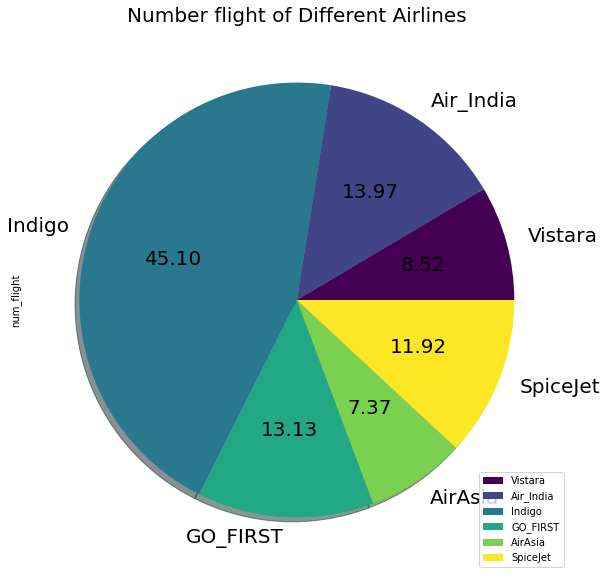

In [ ]:
d={'num_flight':[133,218,704,205,115,186],'airline':['Vistara','Air_India','Indigo','GO_FIRST','AirAsia','SpiceJet']}
df=pd.DataFrame(data=d)
df=df.set_index('airline')
plt.figure(figsize=(12,10))
df['num_flight'].plot(kind='pie',textprops={'color':'black', 'fontsize': 20},autopct='%.2f',cmap='viridis', shadow=True)
plt.title('Number flight of Different Airlines',fontsize=20)
plt.legend(['Vistara','Air_India','Indigo','GO_FIRST','AirAsia','SpiceJet'])
plt.show()

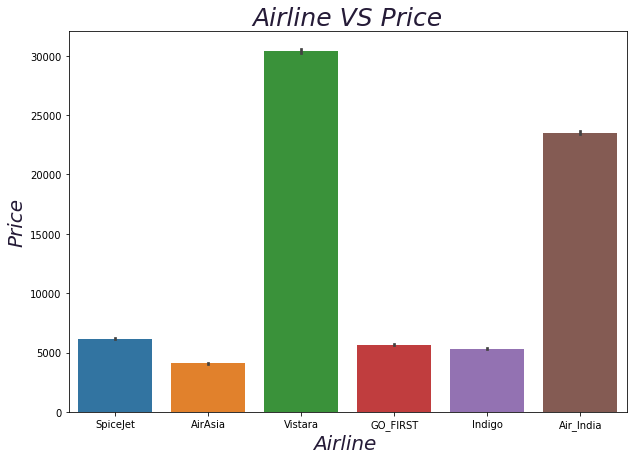

In [ ]:
sns.barplot(data=data,x='airline',y='price')
plt.xlabel(fontsize=20,color='#251B37',xlabel='Airline ',fontstyle='italic')
plt.ylabel(fontsize=20,color='#251B37',ylabel='Price',fontstyle='italic')
plt.title(label='Airline VS Price',fontsize=25,color='#251B37',fontstyle='italic')
plt.rcParams["figure.figsize"] = (15,10)
plt.show()

Text(0.5, 1.0, 'Price With Airline')

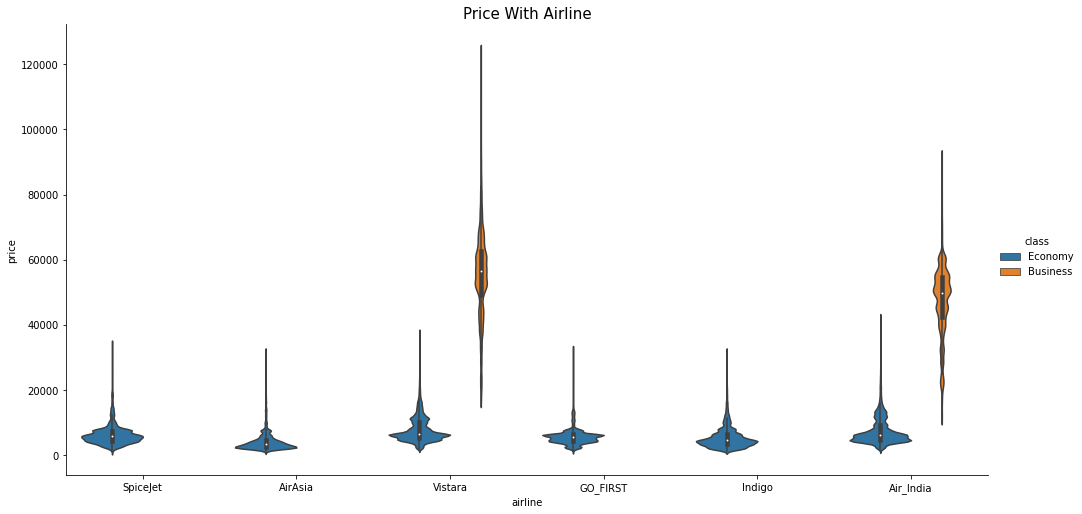

In [ ]:
sns.catplot(kind='violin',data=data,x='airline',y='price',hue="class",aspect=2,height=7)
plt.title('Price With Airline',fontsize=15)

<Figure size 1800x720 with 0 Axes>

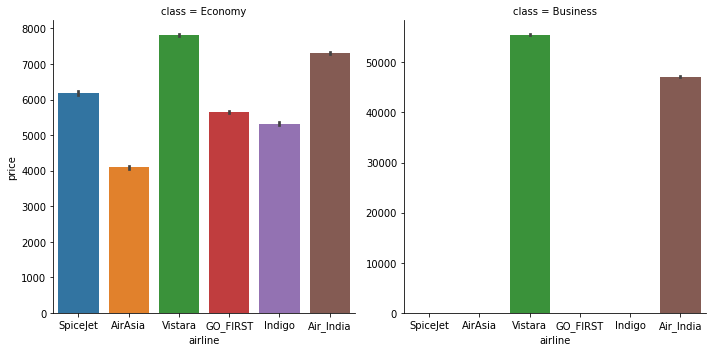

In [ ]:
plt.figure(figsize=(25,10))    
sns.catplot(y='price', x='airline', data=data, kind='bar',col='class',sharey=False)
plt.show()

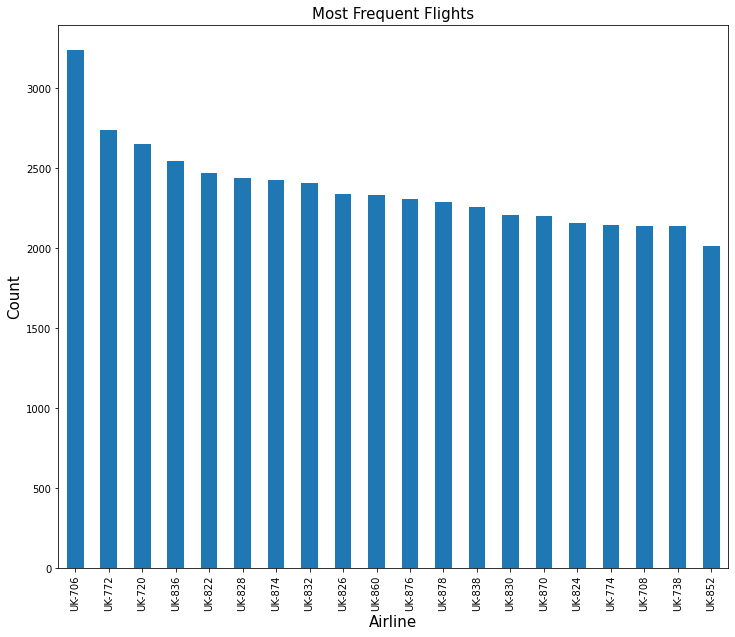

In [ ]:
flights_Code = data.flight.value_counts().head(20).sort_values(ascending=False)
plt.figure(figsize=(12,10))
# sns.countplot(flights_Code,palette='hls')
flights_Code.plot(kind='bar')
plt.title('Most Frequent Flights',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [ ]:
data[data['airline']=='Vistara'].groupby(['flight','airline']).count().head(10)

,,Unnamed: 0,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
flight,airline,,,,,,,,,,
UK-613,Vistara,371,371,371,371,371,371,371,371,371,371
UK-621,Vistara,113,113,113,113,113,113,113,113,113,113
UK-627,Vistara,151,151,151,151,151,151,151,151,151,151
UK-637,Vistara,401,401,401,401,401,401,401,401,401,401
UK-641,Vistara,6,6,6,6,6,6,6,6,6,6
UK-651,Vistara,354,354,354,354,354,354,354,354,354,354
UK-653,Vistara,515,515,515,515,515,515,515,515,515,515
UK-655,Vistara,209,209,209,209,209,209,209,209,209,209
UK-657,Vistara,755,755,755,755,755,755,755,755,755,755


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


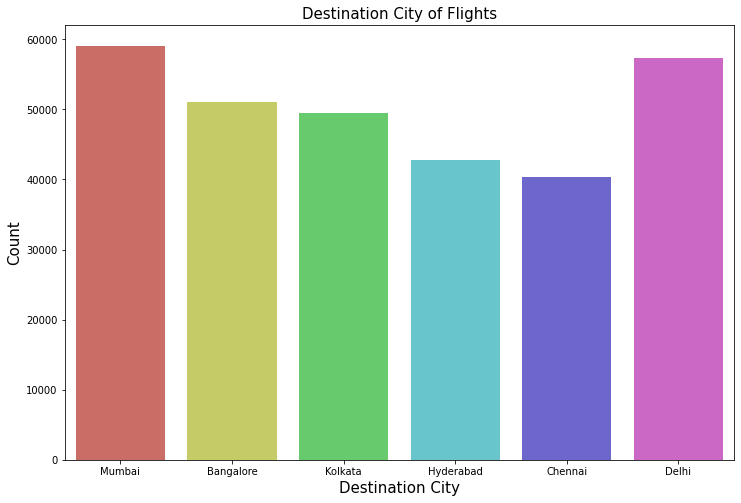

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data['destination_city'],palette='hls')
plt.title('Destination City of Flights',fontsize=15)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

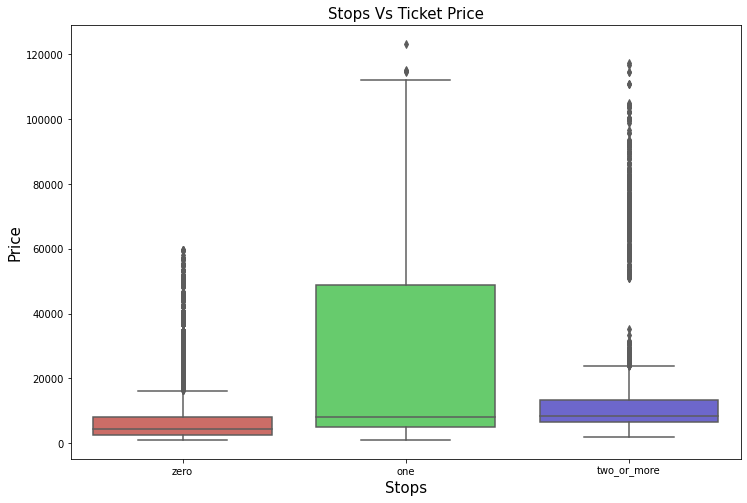

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='stops',y='price',data=data,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

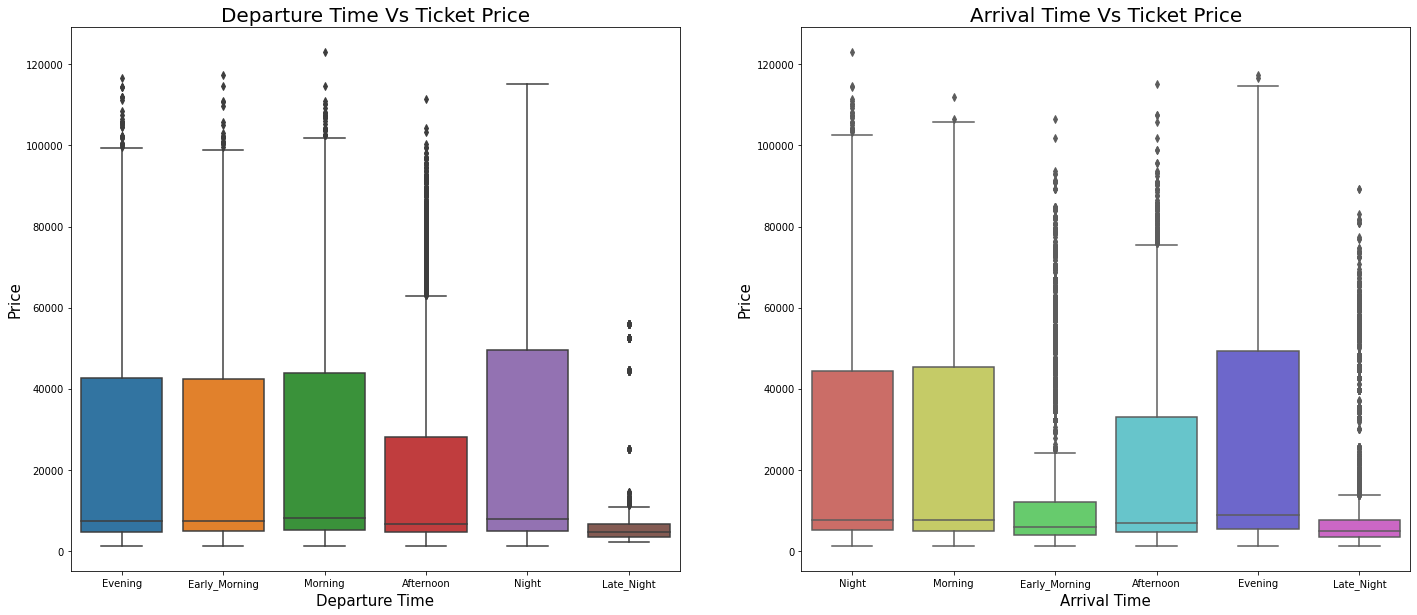

In [ ]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=data)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=data,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

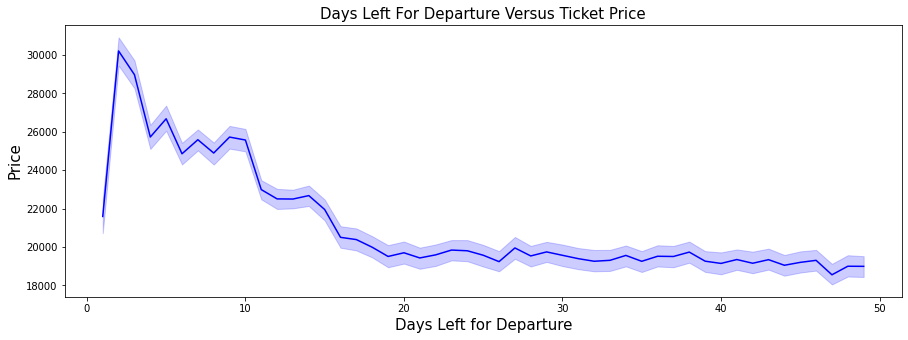

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=15)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Data preprocessing

Checking for missing values

In [ ]:
data.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

Checking for duplicate values

In [ ]:
data.duplicated().sum()

0

Handling outliers

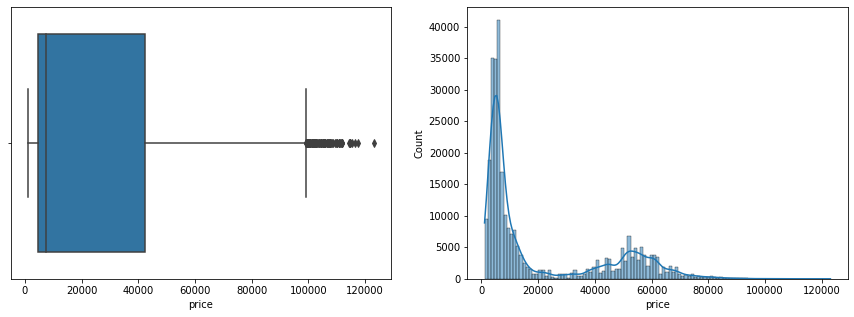

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(x = 'price', data = data)
plt.subplot(1,2,2)
sns.histplot(x = 'price', data = data, kde = True)

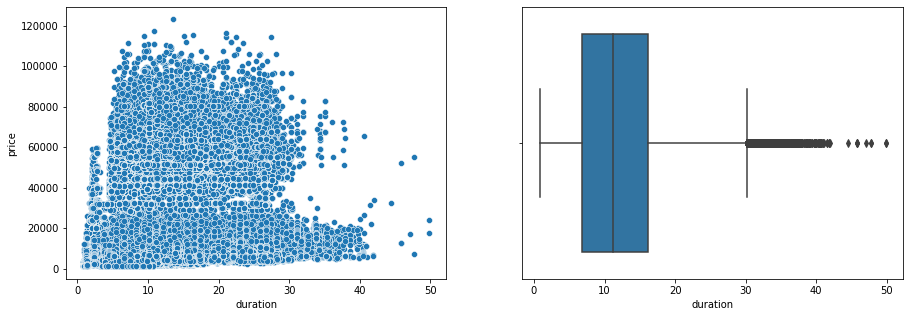

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=data,x='duration',y='price')
plt.subplot(1,2,2)
sns.boxplot(data=data,x='duration')

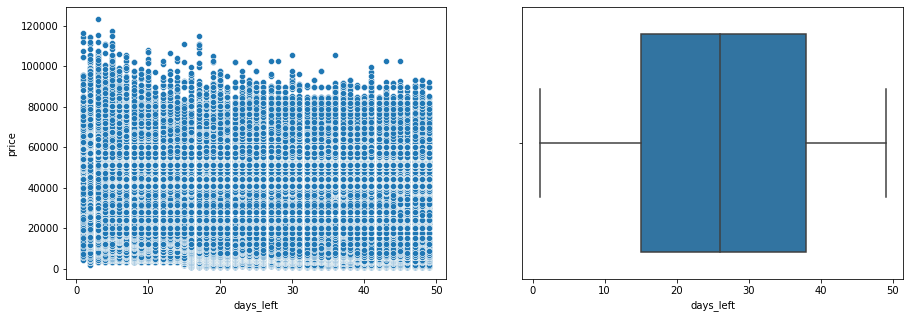

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=data,x='days_left',y='price')
plt.subplot(1,2,2)
sns.boxplot(data=data,x='days_left')

In [ ]:
x=data[data['price']<100000]
x.shape

(300045, 12)

In [ ]:
x=data[data['duration']>30]
x.shape

(2226, 12)

In [ ]:
data=data[data['price']<100000]
data=data[data['duration']<30]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297720 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        297720 non-null  int64  
 1   airline           297720 non-null  object 
 2   flight            297720 non-null  object 
 3   source_city       297720 non-null  object 
 4   departure_time    297720 non-null  object 
 5   stops             297720 non-null  object 
 6   arrival_time      297720 non-null  object 
 7   destination_city  297720 non-null  object 
 8   class             297720 non-null  object 
 9   duration          297720 non-null  float64
 10  days_left         297720 non-null  int64  
 11  price             297720 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 29.5+ MB


Data Cleaning

Dropping unnecessary columns

In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297720 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           297720 non-null  object 
 1   flight            297720 non-null  object 
 2   source_city       297720 non-null  object 
 3   departure_time    297720 non-null  object 
 4   stops             297720 non-null  object 
 5   arrival_time      297720 non-null  object 
 6   destination_city  297720 non-null  object 
 7   class             297720 non-null  object 
 8   duration          297720 non-null  float64
 9   days_left         297720 non-null  int64  
 10  price             297720 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.3+ MB


In [ ]:
le=LabelEncoder
airline_le=LabelEncoder()
data['airline']=airline_le.fit_transform(data['airline'])
flight_le=LabelEncoder()
data['flight']=flight_le.fit_transform(data['flight'])
source_city_le=LabelEncoder()
data['source_city']=source_city_le.fit_transform(data['source_city'])
departure_time_le=LabelEncoder()
data['departure_time']=departure_time_le.fit_transform(data['departure_time'])
stops_le=LabelEncoder()
data['stops']=stops_le.fit_transform(data['stops'])
arrival_time_le=LabelEncoder()
data['arrival_time']=arrival_time_le.fit_transform(data['arrival_time'])
destination_city_le=LabelEncoder()
data['destination_city']=destination_city_le.fit_transform(data['destination_city'])
class_le=LabelEncoder()
data['class']=class_le.fit_transform(data['class'])

In [ ]:
airline_le.classes_

array(['AirAsia', 'Air_India', 'GO_FIRST', 'Indigo', 'SpiceJet',
       'Vistara'], dtype=object)

In [ ]:
flight_le.classes_

array(['6E-102', '6E-105', '6E-113', ..., 'UK-994', 'UK-995', 'UK-996'],
      dtype=object)

In [ ]:
destination_city_le.classes_

array(['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai'],
      dtype=object)

In [ ]:
class_le.classes_

array(['Business', 'Economy'], dtype=object)

In [ ]:
data.corr()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
airline,1.000000,0.635802,-0.028967,0.057271,-0.030738,0.037378,-0.027150,-0.177537,0.007310,-0.012061,0.242182
flight,0.635802,1.000000,-0.009369,0.072334,-0.120081,0.067260,-0.034049,-0.259440,0.216234,-0.000940,0.305566
source_city,-0.028967,-0.009369,1.000000,-0.006713,0.002564,0.042966,-0.224786,0.001350,0.015501,-0.003799,0.003589
departure_time,0.057271,0.072334,-0.006713,1.000000,-0.007386,-0.045328,-0.002453,-0.053339,0.094472,-0.001649,0.058811
stops,-0.030738,-0.120081,0.002564,-0.007386,1.000000,0.010161,-0.011617,0.099855,-0.494524,-0.006215,-0.203460
arrival_time,0.037378,0.067260,0.042966,-0.045328,0.010161,1.000000,-0.037585,-0.027263,0.012036,-0.004488,0.041850
destination_city,-0.027150,-0.034049,-0.224786,-0.002453,-0.011617,-0.037585,1.000000,0.001077,-0.000370,-0.004968,0.005505
class,-0.177537,-0.259440,0.001350,-0.053339,0.099855,-0.027263,0.001077,1.000000,-0.153553,0.013693,-0.938736
duration,0.007310,0.216234,0.015501,0.094472,-0.494524,0.012036,-0.000370,-0.153553,1.000000,-0.033456,0.215879
days_left,-0.012061,-0.000940,-0.003799,-0.001649,-0.006215,-0.004488,-0.004968,0.013693,-0.033456,1.000000,-0.090955


In [ ]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


In [ ]:
x= data.drop(['price'] , axis=1).values
y = data['price'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [ ]:
x_train.shape

(238176, 10)

In [ ]:
x_test.shape

(59544, 10)

Data Scaling

In [ ]:
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

In [ ]:
x_train.shape

(238176, 10)

Modelling

Linear Regression

In [ ]:
reg = linear_model.LinearRegression()

In [ ]:
reg.fit(x_train , y_train)

LinearRegression()

In [ ]:
train_score_reg=reg.score(x_train,y_train)
test_score_reg=reg.score(x_test,y_test)
reg.coef_

array([  3573.87834132,    218.34120059,    319.61093769,    128.58930694,
        -3384.43955818,    568.72407177,    362.3188637 , -44473.06513009,
          665.85935604,  -2979.81695343])

In [ ]:
pd.DataFrame(reg.coef_ , data.columns[:-1] , columns=['Coeficient'])

,Coeficient
airline,3573.878341
flight,218.341201
source_city,319.610938
departure_time,128.589307
stops,-3384.439558
arrival_time,568.724072
destination_city,362.318864
class,-44473.065130
duration,665.859356
days_left,-2979.816953


In [ ]:
Y_pred = reg.predict(x_test)
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(10)

,Y_test,Y_pred
0,2278,-375.029773
1,5402,3535.206826
2,49725,50943.673502
3,24056,45288.111446
4,55983,55029.364172
5,3000,-2096.355029
6,4697,7070.864995
7,6133,7104.080404
8,4202,3037.140147
9,6067,7641.027051


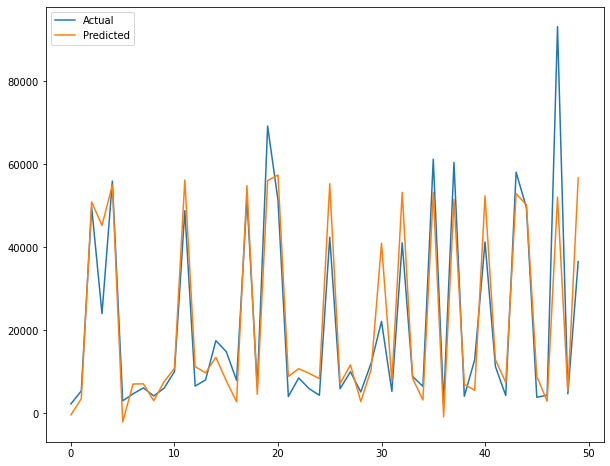

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(data[:50])
plt.legend(["Actual" , "Predicted"])

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
import statsmodels.api as sm

In [ ]:
y_pred_reg=reg.predict(x_test)
lin_score_reg = r2_score(y_test , y_pred_reg)
lin_score_reg

0.9051917413403039

In [ ]:
p = len(x_train[0])
n = len(y_train)
adj_R2_reg = 1-(1-lin_score_reg)*(n-1)/(n-p-1)
adj_R2_reg

0.9051877605598089

In [ ]:
lin_score_reg>adj_R2_reg

True

In [ ]:
lin_mape_reg= mean_absolute_percentage_error(y_test,y_pred_reg)
lin_mape_reg

0.4385560362249626

In [ ]:
mae_reg=mean_absolute_error(y_test,y_pred_reg)
mae_reg

4647.79987215375

In [ ]:
mse_reg=mean_squared_error(y_test,y_pred_reg)
mse_reg

48924158.69168562

In [ ]:
rmse_reg=mse_reg**0.5
rmse_reg

6994.580665893104

Ridge Regression Model

In [ ]:
rid = linear_model.Ridge(  alpha=0.9)

In [ ]:
rid.fit(x_train , y_train)

Ridge(alpha=0.9)

In [ ]:
train_score_rid=rid.score(x_train,y_train)

In [ ]:
test_score_rid=rid.score(x_test,y_test)

In [ ]:
y_pred =rid.predict(x_test)
data = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
data.head(10)

,Y_test,Y_pred
0,2278,-375.009072
1,5402,3535.499317
2,49725,50943.089195
3,24056,45287.622372
4,55983,55028.936424
5,3000,-2096.091523
6,4697,7071.122653
7,6133,7104.173815
8,4202,3037.200838
9,6067,7641.402137


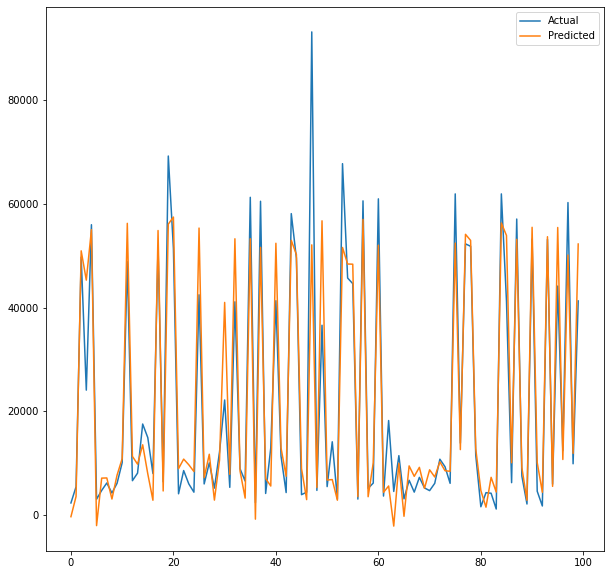

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(data[:100])
plt.legend(["Actual" , "Predicted"])

In [ ]:
rid = linear_model.Ridge(alpha=0.5)
rid.fit(x_train, y_train)

Ridge(alpha=0.5)

In [ ]:
train_score_rid=rid.score(x_train,y_train)

In [ ]:
intercept_rid=rid.intercept_

In [ ]:
y_pred_rid=rid.predict(x_test)

In [ ]:
lin_score_rid = r2_score(y_test , y_pred_rid)
lin_score_rid

0.9051916998820773

In [ ]:
adj_R2_rid = 1-(1-lin_score_rid)*(n-1)/(n-p-1)
adj_R2_rid

0.9051877190998415

In [ ]:
lin_score_rid>adj_R2_rid

True

In [ ]:
lin_mape_rid= mean_absolute_percentage_error(y_test,y_pred_rid)
lin_mape_rid

0.438560203508164

In [ ]:
mae_rid=mean_absolute_error(y_test,y_pred_rid)
mae_rid

4647.820032057988

In [ ]:
mse_rid=mean_squared_error(y_test,y_pred_rid)
mse_rid

48924180.08548493

In [ ]:
rmse_rid=mse_rid**0.5
rmse_rid

6994.582195205438

Lasso Regression Model

In [ ]:
las = linear_model.Lasso(alpha=0.7)
las.fit(x_train, y_train)

Lasso(alpha=0.7)

In [ ]:
train_score_las=las.score(x_train,y_train)

In [ ]:
test_score_las=las.score(x_test,y_test)

In [ ]:
intercept_las=las.intercept_

In [ ]:
y_pred =las.predict(x_test)
data = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
data.head(10)

,Y_test,Y_pred
0,2278,-374.848302
1,5402,3541.304370
2,49725,50941.874212
3,24056,45286.046388
4,55983,55023.227200
5,3000,-2094.643063
6,4697,7074.594895
7,6133,7107.203107
8,4202,3036.210070
9,6067,7640.305426


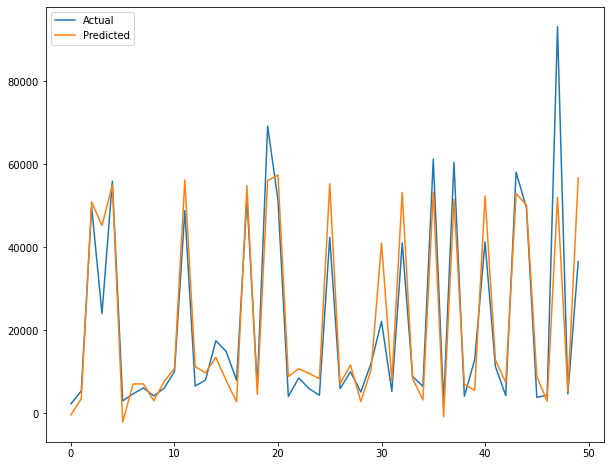

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(data[:50])
plt.legend(["Actual" , "Predicted"])

In [ ]:
y_pred_las=las.predict(x_test)

In [ ]:
lin_score_las = r2_score(y_test , y_pred_las)
lin_score_las

0.9051910997459934

In [ ]:
adj_R2_las = 1-(1-lin_score_las)*(n-1)/(n-p-1)
adj_R2_las

0.9051871189385593

In [ ]:
lin_score_las>adj_R2_las

True

In [ ]:
lin_mape_las= mean_absolute_percentage_error(y_test,y_pred_las)
lin_mape_las

0.43844758522119437

In [ ]:
mae_las=mean_absolute_error(y_test,y_pred_las)
mae_las

4647.432576280341

In [ ]:
mse_las=mean_squared_error(y_test,y_pred_las)
mse_las

48924489.77530964

In [ ]:
rmse_las=mse_las**0.5
rmse_las

6994.6043330062375

Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_features=10,max_depth=7,random_state=42)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=7, max_features=10, random_state=42)

In [ ]:
train_score_dt=dt.score(x_train,y_train)

In [ ]:
test_score_dt=dt.score(x_test ,y_test)

In [ ]:
y_pred =dt.predict(x_test)
data = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
data.head(10)

,Y_test,Y_pred
0,2278,3008.250332
1,5402,6050.993118
2,49725,48425.144941
3,24056,26776.889143
4,55983,60777.733367
5,3000,2550.634951
6,4697,5485.276010
7,6133,4922.398639
8,4202,4562.384835
9,6067,6050.993118


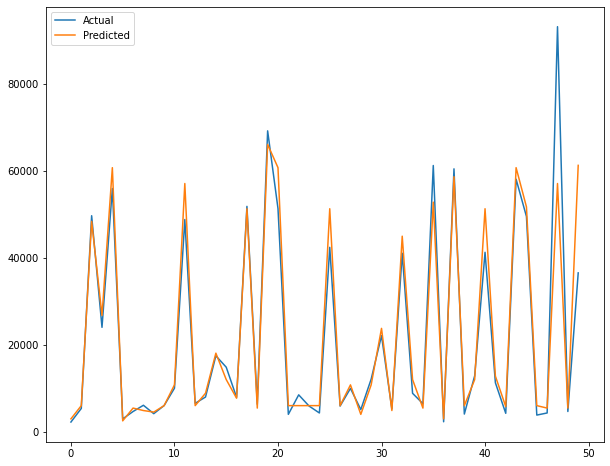

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(data[:50])
plt.legend(["Actual" , "Predicted"])

In [ ]:
y_pred_dt=dt.predict(x_test)

In [ ]:
lin_score_dt = r2_score(y_test , y_pred_dt)
lin_score_dt

0.9538148039180072

In [ ]:
adj_R2_dt = 1-(1-lin_score_dt)*(n-1)/(n-p-1)
adj_R2_dt

0.9538128647079603

In [ ]:
lin_score_dt>adj_R2_dt

True

In [ ]:
lin_mape_dt= mean_absolute_percentage_error(y_test,y_pred_dt)
lin_mape_dt

0.1939500928067273

In [ ]:
mae_dt=mean_absolute_error(y_test,y_pred_dt)
mae_dt

2830.426439542751

In [ ]:
mse_dt=mean_squared_error(y_test,y_pred_dt)
mse_dt

23833069.96948991

In [ ]:
rmse_dt=mse_dt**0.5
rmse_dt

4881.9125319376535

Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=7,max_features=10,random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=7, max_features=10, random_state=42)

In [ ]:
train_score_rf=rf.score(x_train,y_train)

In [ ]:
test_score_rf=rf.score(x_test,y_test)

In [ ]:
y_pred =rf.predict(x_test)
data = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
data.head(10)

,Y_test,Y_pred
0,2278,2994.647110
1,5402,6023.915230
2,49725,48714.461760
3,24056,26789.171200
4,55983,60601.140935
5,3000,2647.433598
6,4697,5486.636727
7,6133,5084.560712
8,4202,4375.243663
9,6067,6052.137962


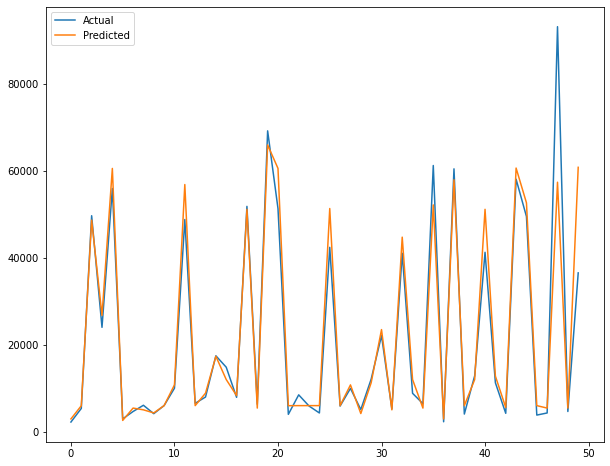

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(data[:50])
plt.legend(["Actual" , "Predicted"])

In [ ]:
y_pred_rf=rf.predict(x_test)

In [ ]:
lin_score_rf = r2_score(y_test , y_pred_rf)
lin_score_rf

0.955064838399264

In [ ]:
adj_R2_rf = 1-(1-lin_score_rf)*(n-1)/(n-p-1)
adj_R2_rf

0.955062951675287

In [ ]:
lin_score_rf>adj_R2_rf

True

In [ ]:
lin_mape_rf= mean_absolute_percentage_error(y_test,y_pred_rf)
lin_mape_rf

0.1918953981163066

In [ ]:
mae_rf=mean_absolute_error(y_test,y_pred_rf)
mae_rf

2789.196381088163

In [ ]:
mse_rf=mean_squared_error(y_test,y_pred_rf)
mse_rf

23188011.340677783

In [ ]:
rmse_rf=mse_rf**0.5
rmse_rf

4815.393165742314

In [ ]:
import statsmodels.api as sm

In [ ]:
x2=sm.add_constant(x)
est=sm.OLS(y,x2)

In [ ]:
est2=est.fit()

In [ ]:
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 2.868e+05
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        04:21:03   Log-Likelihood:            -3.0565e+06
No. Observations:              297720   AIC:                         6.113e+06
Df Residuals:                  297709   BIC:                         6.113e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.051e+04     70.841    713.075      0.0

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state = 0)
lr_clf.fit(x_train , y_train)
y_pred = lr_clf.predict(x_test)
evaluate_model(y_pred,y_test)